## Illustrating the LSC EvoNetV1Dataset


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [3]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np


from evotrain.models.lsc10.v13.dataset import EvoNetV1Dataset

In [4]:
NET_LABEL_NAMES = [
    "Trees",
    "Shrub",
    "Herbaceous",
    "Built-up",
    "Bare",
    "Snow/ice",
    "Water",
    "Lichen",
    "Thick clouds",
    "Thin clouds",
    "Shadow",
    "Herbaceous wetland",
    "Mangrove",
    "Cropland",
]


In [1]:
import torch

In [5]:
t = torch.rand(64, 13, 256, 256)
m = torch.max(t, dim=1, keepdim=True)

In [17]:
m[0]

tensor([[[[0.9935, 0.9670, 0.9027,  ..., 0.8384, 0.6307, 0.9887],
          [0.8622, 0.9844, 0.7528,  ..., 0.9333, 0.9313, 0.9733],
          [0.9797, 0.9593, 0.9834,  ..., 0.9887, 0.7094, 0.9899],
          ...,
          [0.9782, 0.9019, 0.9290,  ..., 0.9872, 0.9318, 0.8922],
          [0.9423, 0.9745, 0.9423,  ..., 0.7912, 0.8074, 0.7313],
          [0.9940, 0.9671, 0.8430,  ..., 0.9738, 0.9022, 0.9897]]],


        [[[0.9944, 0.9691, 0.9663,  ..., 0.8817, 0.9693, 0.9688],
          [0.9650, 0.9199, 0.9854,  ..., 0.9937, 0.7587, 0.9167],
          [0.9411, 0.7643, 0.8452,  ..., 0.9835, 0.7875, 0.9205],
          ...,
          [0.9012, 0.9754, 0.9327,  ..., 0.9671, 0.9561, 0.9847],
          [0.9707, 0.9788, 0.9343,  ..., 0.9323, 0.9649, 0.9506],
          [0.7506, 0.9867, 0.9462,  ..., 0.9473, 0.9599, 0.9804]]],


        [[[0.9631, 0.9504, 0.9289,  ..., 0.8547, 0.7638, 0.7053],
          [0.8406, 0.9530, 1.0000,  ..., 0.9138, 0.9156, 0.9845],
          [0.9246, 0.7660, 0.9303,  ..

In [5]:
ds = EvoNetV1Dataset(
    bands=["B04", "B03", "B02", "cop-DEM-alt"],
    rgb_bands=None,
    flip_augmentation=True,
    rotate_augmentation=True,
    augmented_scaling=False,
    k_factor=5,
    k_factor_jitter=2,
    meteo_jitter=0.05,
    latlon_jitter=0.5,
    doy_jitter=15,
    shuffle_locs=False,
    sort_locs_by_latitude=False,
)

### Let's load some data

In [9]:
# len(ds)
it = 20
data, head, probs = ds[it]
sample_id = ds.ids[it]

### Plot the loaded data

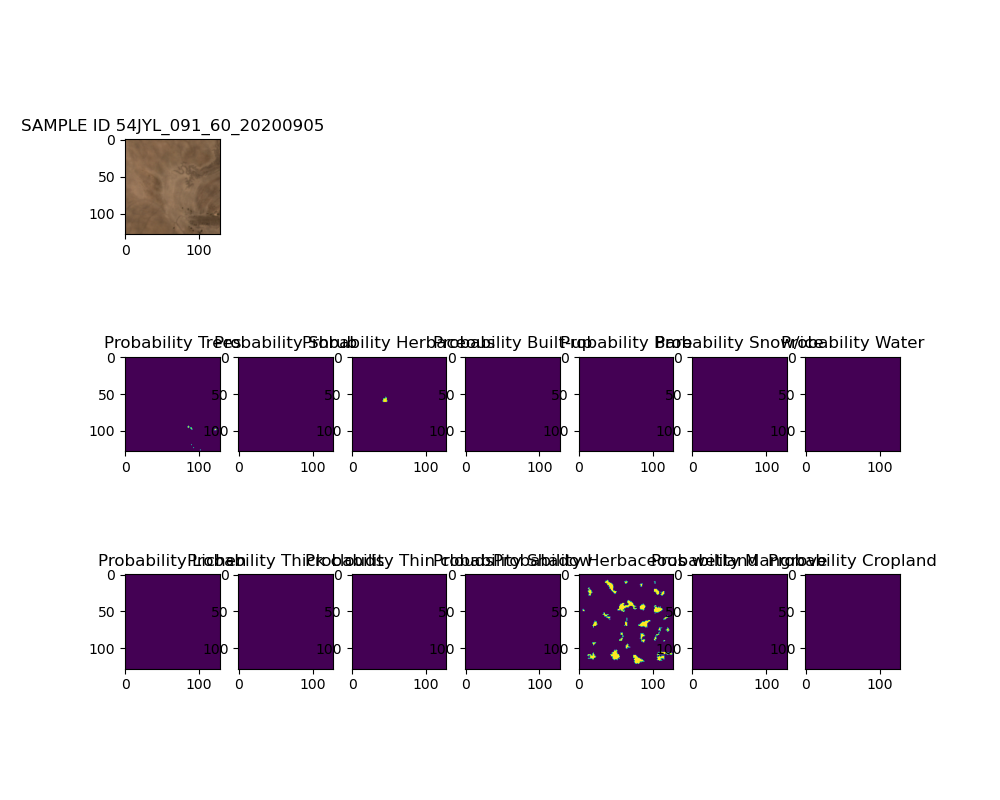

In [15]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

nrows = 3
ncols = 7
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(nrows, ncols, figure=fig)

ax = fig.add_subplot(gs[0, 0])
plt.imshow(np.moveaxis(data.numpy()[:3], [0, 1, 2], [2, 0, 1]) * 2.5)
plt.title(f"SAMPLE ID {sample_id}")

for ind, prob in enumerate(probs.numpy()):
    # rgb
    r = (ind // ncols) + 1
    c = ((ind + 1) % ncols) - 1
    ax = fig.add_subplot(gs[r, c])
    plt.imshow(prob.squeeze())
    plt.title(f"Probability {NET_LABEL_NAMES[ind]}")


In [ ]:
data.shape

In [ ]:
head.shape

In [ ]:
probs.shape